In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [8]:
# calling the dataset
creditcard_data = pd.read_csv("creditcard.csv", error_bad_lines=False)
creditcard_data.head()

<ipython-input-8-0a1a1dc67f49>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  creditcard_data = pd.read_csv("creditcard.csv", error_bad_lines=False)
Skipping line 3986: expected 31 fields, saw 32
Skipping line 5973: expected 31 fields, saw 39

<ipython-input-8-0a1a1dc67f49>:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  creditcard_data = pd.read_csv("creditcard.csv", error_bad_lines=False)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [9]:
# dimensions of the dataset
creditcard_data.shape

(144692, 31)

In [10]:
# datatypes
creditcard_data.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13        object
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [11]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144692 entries, 0 to 144691
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    144692 non-null  int64  
 1   V1      144692 non-null  float64
 2   V2      144692 non-null  float64
 3   V3      144692 non-null  float64
 4   V4      144692 non-null  float64
 5   V5      144691 non-null  float64
 6   V6      144691 non-null  float64
 7   V7      144691 non-null  float64
 8   V8      144691 non-null  float64
 9   V9      144691 non-null  float64
 10  V10     144691 non-null  float64
 11  V11     144690 non-null  float64
 12  V12     144690 non-null  float64
 13  V13     144690 non-null  object 
 14  V14     144690 non-null  float64
 15  V15     144690 non-null  float64
 16  V16     144690 non-null  float64
 17  V17     144690 non-null  float64
 18  V18     144690 non-null  float64
 19  V19     144690 non-null  float64
 20  V20     144690 non-null  float64
 21  V21     14

In [12]:
creditcard_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       2
V12       2
V13       2
V14       2
V15       2
V16       2
V17       2
V18       2
V19       2
V20       2
V21       2
V22       2
V23       2
V24       2
V25       2
V26       2
V27       3
V28       3
Amount    3
Class     3
dtype: int64

In [13]:
creditcard_data = creditcard_data.dropna()


In [14]:
columns_to_check = ['V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
creditcard_data = creditcard_data.dropna(subset=columns_to_check)


In [15]:
duplicates = creditcard_data.drop_duplicates(inplace=True)

In [16]:
creditcard_data.shape

(140171, 31)

In [17]:
creditcard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,140171.000000,140171.000000,140171.000000,140171.000000,140171.000000,140171.000000,140171.000000,140171.000000,140171.000000,140171.000000,...,140171.000000,140171.000000,140171.000000,140171.000000,140171.000000,140171.000000,140171.000000,140171.000000,140171.000000,140171.000000
mean,52021.997667,-0.243171,0.014526,0.673825,0.137449,-0.280564,0.078007,-0.115698,0.065438,-0.095919,...,-0.040311,-0.118277,-0.033244,0.012014,0.130071,0.023852,0.002484,0.002906,91.237579,0.001848
std,20933.037318,1.804093,1.607518,1.264102,1.321397,1.305989,1.283935,1.159917,1.206015,1.083662,...,0.700754,0.633315,0.589106,0.595842,0.437380,0.492138,0.380252,0.303182,247.388803,0.042946
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,38004.000000,-1.016534,-0.565716,0.170061,-0.714896,-0.901945,-0.662631,-0.602171,-0.131068,-0.716905,...,-0.226034,-0.548403,-0.171684,-0.325244,-0.136696,-0.325933,-0.059899,-0.004064,6.000000,0.000000
50%,53838.000000,-0.267534,0.103821,0.750189,0.165536,-0.313106,-0.177683,-0.063276,0.080120,-0.156796,...,-0.059743,-0.095632,-0.045058,0.068758,0.166532,-0.064704,0.011873,0.023634,23.950000,0.000000
75%,69583.500000,1.158316,0.773706,1.362712,0.990130,0.238824,0.462965,0.410326,0.373765,0.478390,...,0.113717,0.301178,0.083238,0.408707,0.418924,0.286597,0.087201,0.077114,81.000000,0.000000
max,83879.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [18]:
creditcard_data.Class.value_counts()                 #Valid = 0, Fraud = 1

0.0    139912
1.0       259
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='Count'>

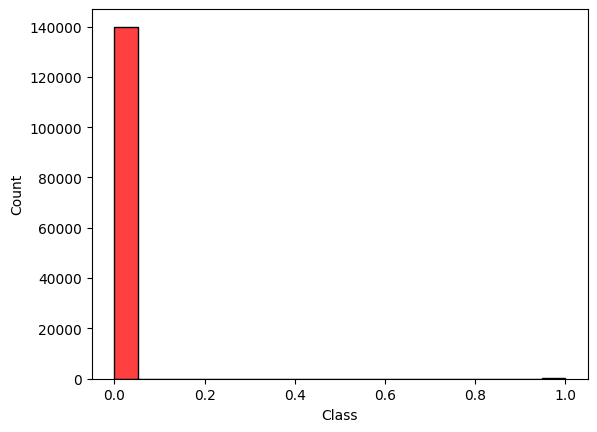

In [19]:
sns.histplot(creditcard_data['Class'], color='red')

In [20]:
X = creditcard_data.drop('Class', axis = 1)
y = creditcard_data['Class']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
model = LogisticRegression(random_state = 42)

In [24]:
# Handling class imbalance using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [25]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [26]:
y_pred = model.predict(X_test)

In [27]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))

Confusion Matrix:
 [[27366   615]
 [    3    51]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     27981
         1.0       0.08      0.94      0.14        54

    accuracy                           0.98     28035
   macro avg       0.54      0.96      0.57     28035
weighted avg       1.00      0.98      0.99     28035

precision: 0.07657657657657657
recall: 0.9444444444444444
f1_score: 0.14166666666666664


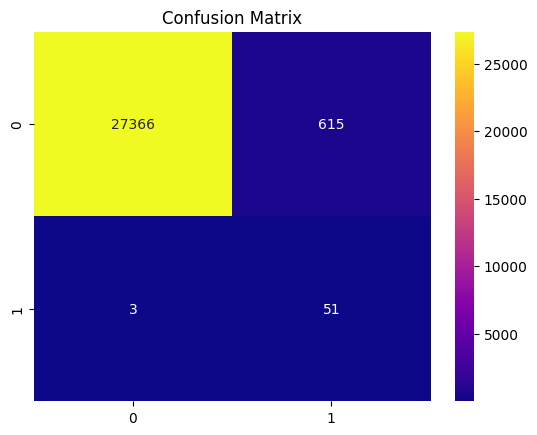

In [28]:
sns.heatmap(cm, annot=True, cmap='plasma', fmt='g')
plt.title('Confusion Matrix')
plt.show()